#### [남북한 발전전력량 분석 및 시각화]
- 데이터셋: 남북한발전전력량.xlxs
- 데이터구성
    * 1990~2016년까지 수력, 화력, 원자력, 신재생 에너지 데이터
- 분석 주제: 남한과 북한의 에너지 데이터 변화 분석

In [63]:
# 모듈 로딩

import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# 데이터 준비
file_data= r'C:\Users\KDP-25\Desktop\EX_PANDAS06\data\남북한발전전력량.xlsx'



In [65]:
# DataFrame 형태로 저장
data_DF= pd.read_excel(file_data)
data_DF.info()
(data_DF.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [66]:
# 데이터 전처리 및 가공
# - 멀티 인덱싱: 컬럼을 행인덱스로 설정
# - 1. NaN컬럼에 대한 처리
# - 2. 두개의 컬럼을 행인덱스로 설정

In [67]:
# - 1. NaN 칼럼에 대한 처리
data_DF.columns[0]            #컬럼명 또는 인덱스
                            #인덱스를 쓰면 값이 바꿔도 작동함


'전력량 (억㎾h)'

In [68]:
data_DF[data_DF.columns[0]].ffill(inplace=True)
data_DF.head()


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_11708\2244155887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_DF[data_DF.columns[0]].ffill(inplace=True)


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [69]:
# data_DF.set_index([data_DF.columns[0], data_DF.columns[1]], inplace=True)
# data_DF.head(10)
# data_DF.isna().count()

data_DF.set_index(data_DF.columns[:2].to_list(), inplace=True)


In [70]:
# 인덱스 이름 변경

idx_names=data_DF.index.names
data_DF.index.set_names({idx_names[0]: '구분', idx_names[1]: '전력'}, inplace=True)

data_DF.head()

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     -     -     -     -     -     -     -     -     -     -  ...     -   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     -     -     -     -    86   118   151   173   195  

[5 rows x 27 columns]

In [71]:
# 결측치 처리
# '-'   ->>>    nan     ->>> 0으로 바꾸기
# for idx in data_DF.columns:
#     data_DF[idx]= data_DF[idx].map(lambda x: str(x).replace('-', '0').strip())

data_DF.replace('-', pd.NA, inplace=True)
data_DF.head()

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생  <NA>  <NA>  <NA>  <NA>    86   118   151   173   195  

[5 rows x 27 columns]

In [72]:
data_DF.fillna(0, inplace=True)
data_DF.isna().T.sum()

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_11708\3112983027.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_DF.fillna(0, inplace=True)


구분  전력 
남한  합계     0
    수력     0
    화력     0
    원자력    0
    신재생    0
북한  합계     0
    수력     0
    화력     0
    원자력    0
dtype: int64

In [73]:
# 데이터를 실수로 전환

data_DF= data_DF.astype(int)


data_DF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int32
 1   1991    9 non-null      int32
 2   1992    9 non-null      int32
 3   1993    9 non-null      int32
 4   1994    9 non-null      int32
 5   1995    9 non-null      int32
 6   1996    9 non-null      int32
 7   1997    9 non-null      int32
 8   1998    9 non-null      int32
 9   1999    9 non-null      int32
 10  2000    9 non-null      int32
 11  2001    9 non-null      int32
 12  2002    9 non-null      int32
 13  2003    9 non-null      int32
 14  2004    9 non-null      int32
 15  2005    9 non-null      int32
 16  2006    9 non-null      int32
 17  2007    9 non-null      int32
 18  2008    9 non-null      int32
 19  2009    9 non-null      int32
 20  2010    9 non-null      int32
 21  2011    9 non-null      int32
 22  2012    9 non-null      int32
 

In [74]:
# 한글 폰트 설정 ->폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

# set_custonFont(r'C:\Windows\Fonts\batang.ttc')

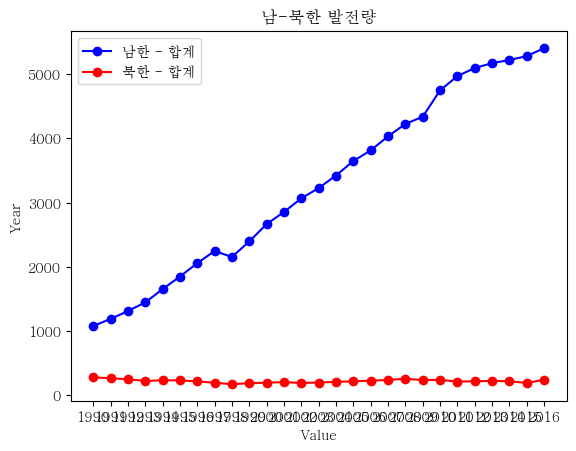

In [75]:
plt.plot(data_DF.loc[('남한', '합계')], 'bo-', label= '남한 - 합계')
plt.plot(data_DF.loc[('북한', '합계')], 'ro-', label= '북한 - 합계')
plt.title('남-북한 발전량')
plt.xlabel('Value')
plt.ylabel('Year')
plt.legend()
plt.show()

In [76]:
def drawLineGraph(title, columns, labels, xlabel, ylabel):
    for col in columns:
        plt.plot(data_DF.loc[(col)], label= f'{col}')
    # for idx, col in enumerate(columns):                  #
    #     plt.plot(data_DF.loc[(col)], 'bo-', label=f'{labels[idx]}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

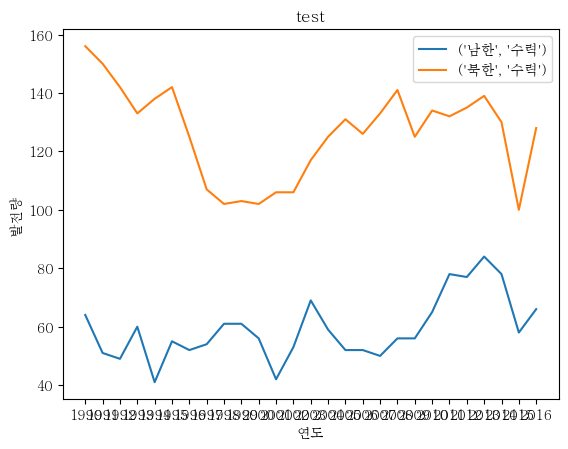

In [77]:
drawLineGraph('test', [('남한', '수력'), ('북한', '수력')],
              ['남한-수력', '북한-수력'], '연도', '발전량')

--------------------------------

- 하나의 figure에 여러개 그래프 넣기


In [78]:
# figure 객체 생성
# - 생성된 객체 안에 subplot 객체 생성
#   * 그래프 표시 방식 지정: 가로/세로 몇개의 그래프를 넣을지 지정
# - subplot에 그래프를 넣기

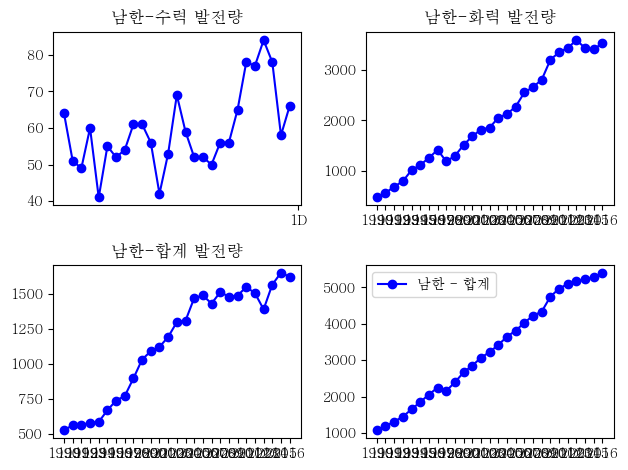

In [79]:
#하나의 figure에서 수력/화력/원자력/합계 그래프 넣기
fig=plt.figure()

# - add_subplot(행수, 열수, 번호)
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

#- 각 subplot에 그래프 넣기

ax1.plot(data_DF.loc[('남한', '수력')], 'bo-', label= '남한 - 수력')
ax2.plot(data_DF.loc[('남한', '화력')], 'bo-', label= '남한 - 화력')
ax3.plot(data_DF.loc[('남한', '원자력')], 'bo-', label= '남한 - 원자력')
ax4.plot(data_DF.loc[('남한', '합계')], 'bo-', label= '남한 - 합계')

#각 subplot별 설정
ax1.set_title('남한-수력 발전량')
ax1.set_label('연도')
ax1.set_xticks( ticks='1D')

ax2.set_title('남한-화력 발전량')
ax2.set_label('연도')

ax3.set_title('남한-원자력 발전량')
ax3.set_label('연도')

ax3.set_title('남한-합계 발전량')
ax3.set_label('연도')

#화명에 띄우기
plt.tight_layout()
plt.legend()
plt.show()

# 반복문으로 줄일 수 있지 않을까?

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]] Axes(0.125,0.53;0.352273x0.35)


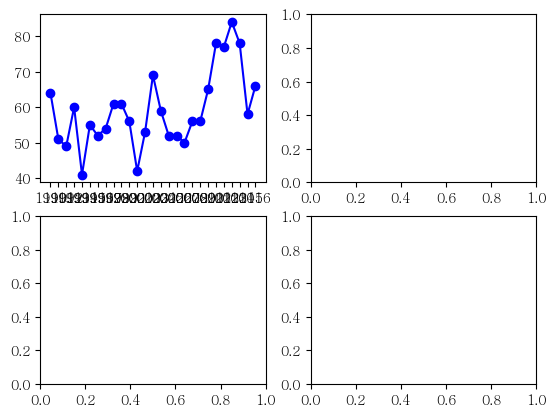

In [84]:
fig=plt.figure()

#subplot 객체 생성 ->axes 객체를 배열에 담아서 반환
                    # ->행단위로 axes담아서 반환
axes= fig.subplots(2,2)  #(2행 2열)  -->알아서 생성해줌

#subplot에 그래프 넣기
print(axes, axes[0,0])    #서브플롯 부르는 형식 ->0,0 /0,1 /1,1 /1,2
axes[0,0].plot(data_DF.loc[('남한', '수력')], 'bo-', label= '남한 - 수력')                    
  #반복문 돌리기 편할듯?



[<Axes: > <Axes: > <Axes: > <Axes: >] Axes(0.125,0.11;0.168478x0.77)


AttributeError: 'Axes' object has no attribute 'set_index'

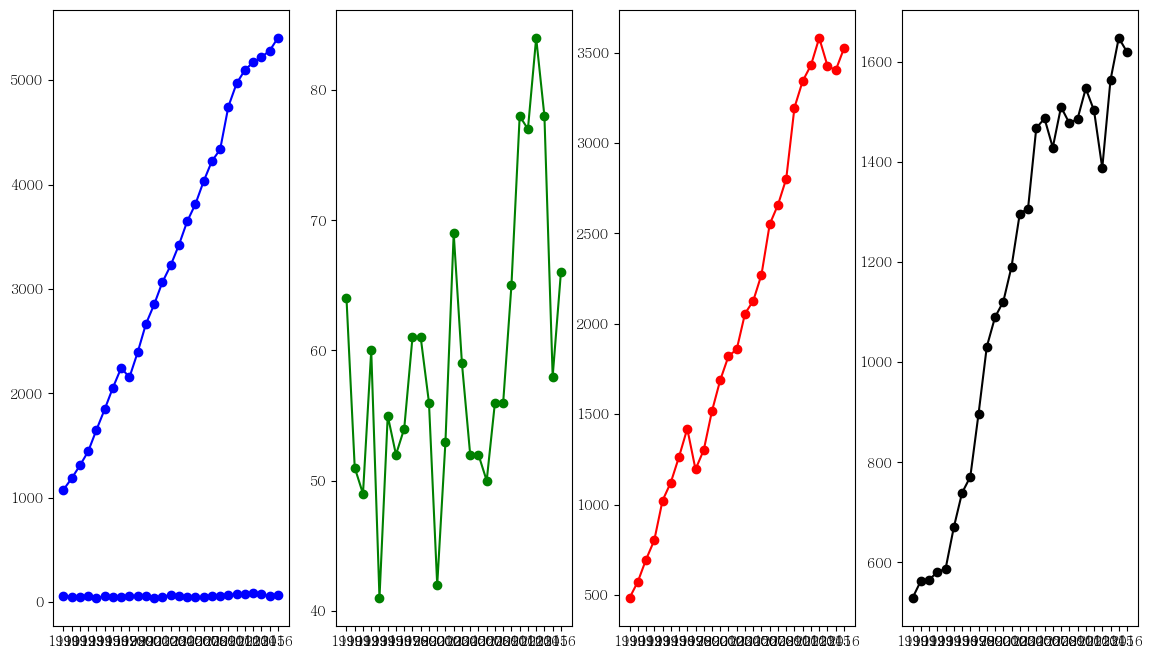

In [105]:
fig=plt.figure(figsize=(14,8))

#subplot 객체 생성 ->axes 객체를 배열에 담아서 반환
                    # ->행단위로 axes담아서 반환
axes= fig.subplots(1,4)  #(2행 2열)  -->알아서 생성해줌

#subplot에 그래프 넣기
print(axes, axes[0])    #서브플롯 부르는 형식 ->0,0 /0,1 /1,1 /1,2
axes[0].plot(data_DF.loc[('남한', '수력')], 'bo-', label= '남한 - 수력')                    
  #반복문 돌리기 편할듯?
# list= ['수력', '화력', '원자력', '합계']
# for i in range(0,4):
#   axes[i].plot(data_DF.loc[('남한', list[i])], 'bo-', label= (f'남한 - {list[i]}'))

fmfs=['bo-', 'go-', 'ro-', 'ko-']
datas=data_DF.index.to_list()[:4]
for idx, ax in enumerate(axes):
    ax.plot(data_DF.loc[datas[idx]], fmfs[idx])
axes[0].set_
# 전체 창, 즉 피규어 설정
fig.suptitle('남한의 에너지 발전량 변화 동향') #폰드 사이즈, 스타일, 등 설정 가능
fig.tight_layout()
plt.show()


In [101]:
datas=data_DF.index[:4].to_list()
datas
type(datas)


list